In [26]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from math import pi, sqrt

## Oscilaciones libres

In [27]:
# Tratamiento de datos

# Datos
m = 3.2*10**(-2)
k = 6.8
l = 4.28*10**(-1)
d = 4.65*10**(-1)
dr = 1.15*10**(-1)
B = 9*10**(-3)
delta = d - l

# Medidas del laboratorio
Ti = [0.43, 0.45, 0.48, 0.49, 0.48, 0.47, 0.46]
Ts = [0.63, 0.58, 0.55, 0.52, 0.51, 0.49, 0.48]
T = list(x+y for x,y in zip(Ti, Ts))

# Cálculo de coeficientes y errores
alpha = 4 * pi**2 / (T[0]**2)
Dalpha = 8 * pi**2 / (T[0]**3) * 0.01
print(f"Error de alpha: {Dalpha}")
beta = k * l / (m * d**3)
Dbeta = (l / (m * d**3) * 0.5 + k / (m * d**3) * 0.001 + k * l / (m**2 * d**3) * 0.001 + 3 * k * l / (m * d**4) * 0.001)
print(f"Error de beta: {Dalpha}")

# Cálculo de amplitud, frecuencia, y errores
A2 = list(x*10**(-2) for x in [0.5, 2, 4, 6, 8, 10, 12]) # A2 es A'
A = list((d / (d - dr))*x for x in A2)
errores_A = list((x * dr / (d - dr)**2 * 0.001 + d * x / (d - dr)**2 * 0.001 + d / (d - dr) * 0.001) for x in A2)
print(f"Error de amplitud: {max(errores_A)}")

w = list(2*pi/x for x in T)
errores_w = list(2*pi/x**2*0.02 for x in T)
print(f"Error de frecuencia: {max(errores_w)}")

Error de alpha: 0.6629368136844077
Error de beta: 0.6629368136844077
Error de amplitud: 0.0018967346938775506
Error de frecuencia: 0.14221786571253026


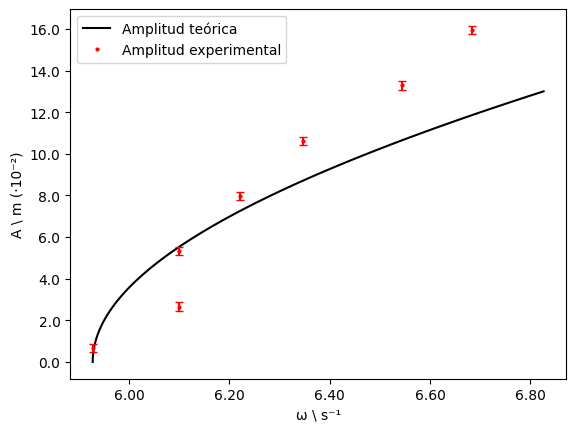

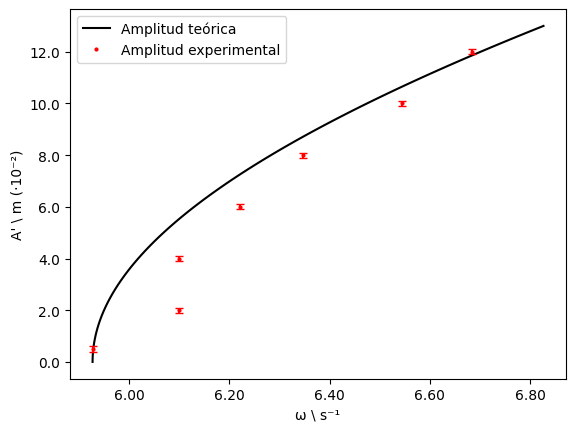

In [28]:
# Representación visual
Ag = list(13*x*10**(-2)/100 for x in range(0, 101))
we = list(sqrt(alpha + 3/4*beta*x**2) for x in Ag)

A_x100 = list(100*x for x in A)
A2_x100 = list(100*x for x in A2)
Ag_x100 = list(100*x for x in Ag)

fig = plt.figure()
plt.plot(we, Ag_x100, label="Amplitud teórica", color="black")
plt.plot(w, A_x100, "o", label="Amplitud experimental", color="red", markersize=2)
plt.errorbar(w, A_x100, yerr=0.2, ls="none", color="red", barsabove=True, capsize=3)
plt.xlabel("ω \\ s⁻¹")
plt.ylabel("A \\ m (⋅10⁻²)")
plt.legend()
xformatter = ticker.FuncFormatter(lambda x, _: f"{x:.2f}")
yformatter = ticker.FuncFormatter(lambda x, _: f"{x:.1f}")
plt.gca().xaxis.set_major_formatter(xformatter)
plt.gca().yaxis.set_major_formatter(yformatter)
plt.show()
fig.savefig('Frecuencia_frente_amplitud_11.png')

fig = plt.figure()
plt.plot(we, Ag_x100, label="Amplitud teórica", color="black")
plt.plot(w, A2_x100, "o", label="Amplitud experimental", color="red", markersize=2)
plt.errorbar(w, A2_x100, yerr=0.1, ls="none", color="red", barsabove=True, capsize=3)
plt.xlabel("ω \\ s⁻¹")
plt.ylabel("A' \\ m (⋅10⁻²)")
plt.legend()
xformatter = ticker.FuncFormatter(lambda x, _: f"{x:.2f}")
yformatter = ticker.FuncFormatter(lambda x, _: f"{x:.1f}")
plt.gca().xaxis.set_major_formatter(xformatter)
plt.gca().yaxis.set_major_formatter(yformatter)
plt.show()
fig.savefig('Frecuencia_frente_amplitud_12.png')

## Oscilaciones forzadas

In [29]:
# Datos
m = 3.2*10**(-2)
k = 6.8
l = 4.28*10**(-1)
d = 4.43*10**(-1)
dr = 1.10*10**(-1)
B = 9*10**(-3)
delta = d - l

# Medidas del laboratorio
T10 = [40.18, 26.81, 17.47, 17.14, 13.39, 12.42, 12.25, 11.51, 11.00, 11.71, 10.34, 9.71, 10.44, 11.12, 11.81, 12.81, 13.71]
xs = list(x/100 for x in [171.0, 171.3, 170.3, 170.8, 165.0, 163.2, 162.4, 161.2, 160.3, 160.2, 167.9, 170.8, 171.0, 171.2, 171.0, 170.7, 170.2])
xi = list(x/100 for x in [172.0, 172.5, 174.0, 173.8, 179.1, 181.2, 181.4, 182.7, 183.9, 183.9, 174.7, 172.6, 172.1, 172.1, 172.0, 172.4, 172.9])

# Cálculo de coeficientes y errores
alpha = 2 * k * delta / (m * d)
Dalpha = 2 * l / (m * d) * 0.5 + 2 * k / (m * d) * 0.001 + 2 * k * l / (m**2 * d) * 0.001 + 2 * k * l / (m * d**2) * 0.001
print(f"Error de alpha: {Dalpha}")
beta = k * l / (m * d**3)
Dbeta = (l / (m * d**3) * 0.5 + k / (m * d**3) * 0.001 + k * l / (m**2 * d**3) * 0.001 + 3 * k * l / (m * d**4) * 0.001)
print(f"Error de beta: {Dbeta}")

# Cálculo de amplitud, frecuencia y errores
T = [x/10 for x in T10]
A2 = list(i-s for i,s in zip(xi, xs))
A = list((d / (d - dr))*x for x in A2)
errores_A = list((x * dr / (d - dr)**2 * 0.001 + d * x / (d - dr)**2 * 0.001 + d / (d - dr) * 0.002) for x in A2)
print(f"Error de amplitud: {max(errores_A)}")
w = list(2*pi/x for x in T)
errores_w = list(20*pi/(x**2) * 0.01 for x in w)
print(f"Error de frecuencia: {max(errores_w)}")

Error de alpha: 44.90967151424975
Error de beta: 119.14312664518488
Error de amplitud: 0.0038425723020317623
Error de frecuencia: 0.25694489674771204


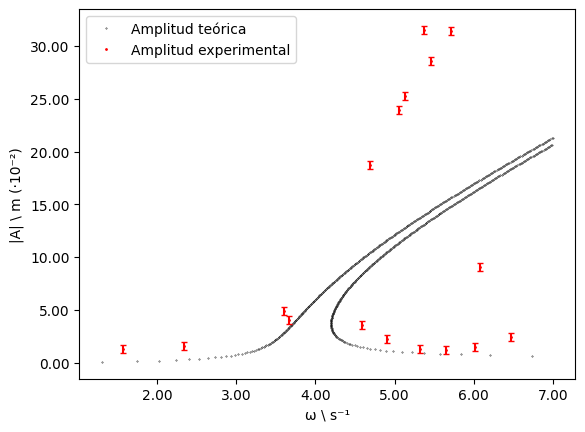

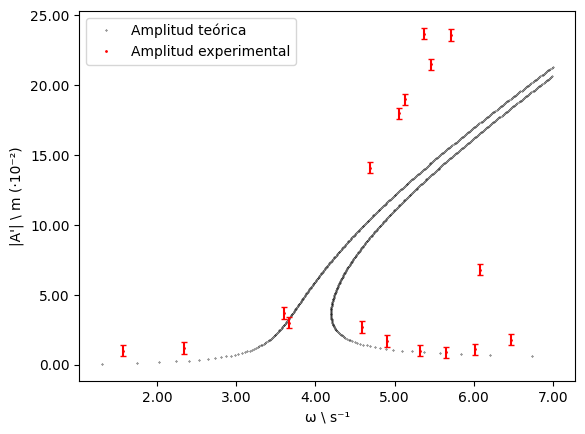

In [30]:
# Representación visual
Agn = list(0.6*x/1000 - 0.3 for x in range(1001))
Agn.remove(0)
Ag = []
wg = []
for x in Agn: # Conseguir los puntos (w, |A|)
    if (2*x)/(2*x+B) > 0 and sqrt((2*x)/(2*x+B)*(alpha+3/4*beta*x**2)) < 7:
        Ag.append(x)
        wg.append(sqrt((2*x)/(2*x+B)*(alpha+3/4*beta*x**2)))
Ag = list(abs(x) for x in Ag)

Ag_x100 = list(100*x for x in Ag)
A2_x100 = list(100*x for x in A2)
A_x100 = list(100*x for x in A)

fig = plt.figure()
plt.plot(wg, Ag_x100, "o", label="Amplitud teórica", color="black", markersize=0.3)
plt.plot(w, A_x100, "o", label="Amplitud experimental", color="red", markersize=1)
plt.errorbar(w, A_x100, yerr=0.38, ls="none", color="red", barsabove=True, capsize=2)
plt.xlabel("ω \\ s⁻¹")
plt.ylabel("|A| \\ m (⋅10⁻²)")
plt.legend()
xformatter = ticker.FuncFormatter(lambda x, _: f"{x:.2f}")
yformatter = ticker.FuncFormatter(lambda x, _: f"{x:.2f}")
plt.gca().xaxis.set_major_formatter(xformatter)
plt.gca().yaxis.set_major_formatter(yformatter)
plt.show()
fig.savefig('Frecuencia_frente_amplitud_21.png')

fig = plt.figure()
plt.plot(wg, Ag_x100, "o", label="Amplitud teórica", color="black", markersize=0.3)
plt.plot(w, A2_x100, "o", label="Amplitud experimental", color="red", markersize=1)
plt.errorbar(w, A2_x100, yerr=0.4, ls="none", color="red", barsabove=True, capsize=2)
plt.xlabel("ω \\ s⁻¹")
plt.ylabel("|A'| \\ m (⋅10⁻²)")
plt.legend()
xformatter = ticker.FuncFormatter(lambda x, _: f"{x:.2f}")
yformatter = ticker.FuncFormatter(lambda x, _: f"{x:.2f}")
plt.gca().xaxis.set_major_formatter(xformatter)
plt.gca().yaxis.set_major_formatter(yformatter)
plt.show()
fig.savefig('Frecuencia_frente_amplitud_22.png')